In [1]:
import gensim
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import spacy
import sklearn as sk

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
import bertopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction

In [ ]:
dir = '../data'

# load data

In [ ]:
train_dfs = [ pd.read_csv( f'{dir}/nlpdata-train-{i}.csv', encoding='utf8' ) for i in range( 5 ) ]
print( train_dfs[ 0 ].shape )
train_dfs[ 0 ].head()

(742, 9)


,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that climate finance suppo...,Even though richer nations agreed to channel $...,p,0,0,0
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,How much needs the climate finance flows to in...,the climate finance flows still need to be inc...,p,1,0,0
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the real growth of climate finance flow...,Climate finance flows have grown by ~5% from 2...,a,2,0,1
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Why mobilization of the $100bn per year by 202...,"According to OECD, only $83bn were channelled ...",s,3,0,2
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that voluntary carbon mark...,The global size of voluntary carbon markets (o...,a,4,0,1


In [ ]:
test_dfs = [ pd.read_csv( f'{dir}/nlpdata-test-{i}.csv', encoding='utf8' ) for i in range( 5 ) ]
print( test_dfs[ 0 ].shape )
test_dfs[ 0 ].head()

(185, 9)


,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What shall solutions focus on to assist develo...,Solutions identified shall ultimately assist d...,s,7,0,2
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that the issuance of Envir...,the first EIB was issued in 2016 by Quantified...,a,9,0,1
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,"- The limited availability of at-scale, bankab...",s,13,0,2
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,-The absence of a global standardized policy f...,s,13,0,2
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,In which type of project is used climate fundi...,The fundings have been primarily used to fund ...,a,17,0,1


# preprocess (without lemmatization)

In [ ]:
for train_df, test_df in zip( train_dfs, test_dfs ):
    for df in [ train_df, test_df ]:
        df[ 'text' ] = df.Question + ' ' + df.Answer.str.replace( r'\[[0-9]*\]', '' )

In [ ]:
train_dfs[ 0 ].head()

,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id,text
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that climate finance suppo...,Even though richer nations agreed to channel $...,p,0,0,0,What's the evidence that climate finance suppo...
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,How much needs the climate finance flows to in...,the climate finance flows still need to be inc...,p,1,0,0,How much needs the climate finance flows to in...
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the real growth of climate finance flow...,Climate finance flows have grown by ~5% from 2...,a,2,0,1,What's the real growth of climate finance flow...
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Why mobilization of the $100bn per year by 202...,"According to OECD, only $83bn were channelled ...",s,3,0,2,Why mobilization of the $100bn per year by 202...
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that voluntary carbon mark...,The global size of voluntary carbon markets (o...,a,4,0,1,What's the evidence that voluntary carbon mark...


In [ ]:
test_dfs[ 0 ].head()

,Page,URL,Topic,Question,Answer,Label,qid,tpc_id,lbl_id,text
0,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What shall solutions focus on to assist develo...,Solutions identified shall ultimately assist d...,s,7,0,2,What shall solutions focus on to assist develo...
1,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,What's the evidence that the issuance of Envir...,the first EIB was issued in 2016 by Quantified...,a,9,0,1,What's the evidence that the issuance of Envir...
2,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,"- The limited availability of at-scale, bankab...",s,13,0,2,Which are the roadblocks that hinder the globa...
3,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,Which are the roadblocks that hinder the globa...,-The absence of a global standardized policy f...,s,13,0,2,Which are the roadblocks that hinder the globa...
4,Innovative finance COP27,https://qutii.org/index.php/Innovative_finance...,climate change,In which type of project is used climate fundi...,The fundings have been primarily used to fund ...,a,17,0,1,In which type of project is used climate fundi...


# train topic models

In [ ]:
def train( m, df ):
  docs = df.text
  # train topic model
  topics, probs = m.fit_transform( docs )
  print( f'\t#topic: {len( m.get_topics() )}' )
  # calculate coherence score
  analyzer = m.vectorizer_model.build_analyzer()
  cleaned_docs = m._preprocess_text( docs )
  tokenized_docs = [ analyzer( doc ) for doc in cleaned_docs ]
  dictionary = gensim.corpora.Dictionary( tokenized_docs )
  return gensim.models.CoherenceModel(
    topics=[ [ topic for topic, freq in m.get_topic( i ) if topic in dictionary.token2id ] for i in range( len( set( m.get_topics() ) ) - 1 ) ],
    corpus=[ dictionary.doc2bow( doc ) for doc in tokenized_docs ],
    dictionary=dictionary,
    texts=tokenized_docs,
    coherence='c_v',
  ).get_coherence()

In [ ]:
topic = 'climate change'
m = bertopic.BERTopic()
scores = [ train( m, train_df[ train_df.Topic == topic ].reset_index( drop=True ) ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

	#topic: 7
	#topic: 9
	#topic: 10
	#topic: 6
	#topic: 10


(0.560500587100876,
 0.002924038372902589,
 [0.5425732385708031,
  0.5403560157998165,
  0.6097352994944417,
  0.4793988709947351,
  0.6304395106445835])

# visualization

In [ ]:
m = bertopic.BERTopic(
  vectorizer_model=CountVectorizer(
    min_df=1,
    ngram_range=( 1, 1 ),
    stop_words='english',
  ),
  ctfidf_model=ClassTfidfTransformer(
    reduce_frequent_words=True,
  ),
)

In [ ]:
topic = 'climate change'
scores = [ train( m, train_df[ train_df.Topic == topic ].reset_index( drop=True ) ) for train_df in train_dfs ]
np.mean( scores ), np.var( scores ), scores

	#topic: 7
	#topic: 10
	#topic: 11
	#topic: 6
	#topic: 10


(0.5013592323483047,
 0.0011630535329730171,
 [0.49184723907086564,
  0.5294931024730157,
  0.5508149819798531,
  0.4580975612153882,
  0.47654327700240057])

In [ ]:
topics = m.get_topics()
[ topics[ id ][ 0 ][ 0 ] for id in topics if id >= 0 ]

['finance',
 'board',
 'ice',
 'committee',
 'debt',
 'food',
 'just',
 'carbon',
 'energy']

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def create_wordcloud( model, topic ):
  words = { word: score for word, score in model.get_topic( topic ) }
  wc = WordCloud( max_words=100 )
  wc.generate_from_frequencies( words )
  plt.imshow( wc, interpolation='bilinear' )
  plt.axis( 'off' )
  plt.show()

topic #0


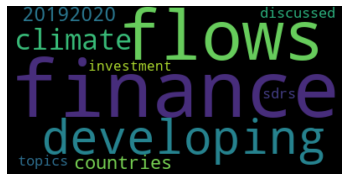

topic #1


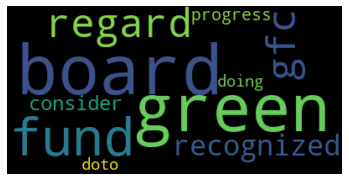

topic #2


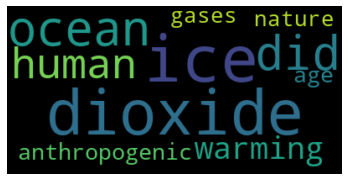

topic #3


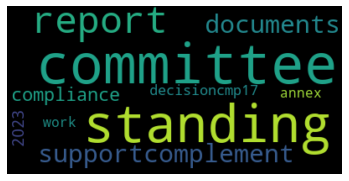

topic #4


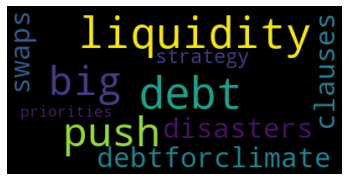

topic #5


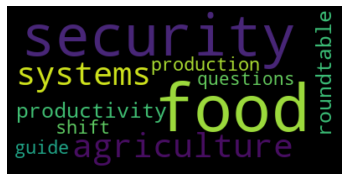

topic #6


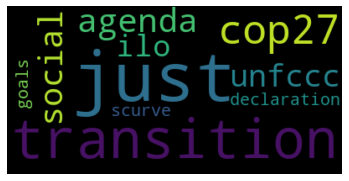

topic #7


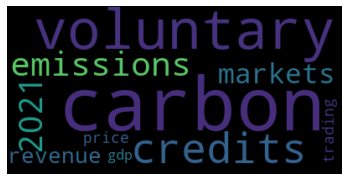

topic #8


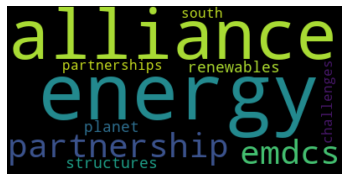

In [ ]:
for topic in m.get_topics():
  if topic >= 0:
    print( f'topic #{topic}' )
    create_wordcloud( m, topic )